# **House Price Prediction**

##### Data Mining II [PG DSBI]

###### By: Carla Lemos e Helder Silva - Feb 2020

<hr>

#### **1. CONTEXTUALIZAÇÃO**

O presente relatório consiste na **análise de um dataset sobre os preços das casas em Portugal recolhido através de web scraping.** O site escolhido para esta extração de dados foi a https://www.era.pt/.

O mercado imobiliário é um segmento essencial de toda a economia do país. Recentemente, o aumento dos preços da habitação em Portugal reflete uma economia em expansão. Do ponto de vista do comprador estrangeiro, a propriedade portuguesa tem um valor surpreendentemente bom, mas na perspetiva do trabalhador português os preços estão acima das "possibilidades de muitas carteiras".

**Os preços dos imóveis em Portugal começaram a recuperar em 2014 e têm subido desde então**. Os preços das casas aumentaram 4,5% em 2015, 4,8% em 2016, 4,6% em 2017, 6,1% em 2018 e 8,3% em 2019.

Por um lado, a maior dificuldade para os portugueses, tanto aqueles que querem **comprar casa** (25%), como aqueles que querem arrendar (36%), é encontrar um imóvel que possam pagar e este modelo será um ponto de partida para efetivar uma boa compra. Por outro lado,**colocar a casa à venda** pressupõe etapas fundamentais, como a definição de preço de venda, podendo o nosso modelo ser uma ferramenta de benchmark. 

Em boa verdade, vender uma casa é um negócio e como em qualquer negócio ninguém gosta de perder. Contudo, não perder dinheiro também não pode significar dar um valor exorbitante e irrealista ao imóvel que pretende vender. Assim, é importante fazer um estudo de mercado e procurar comparar o imóvel com outras casas com características idênticas, preferencialmente na mesma localização.

A análise descrita neste relatório visa criar um **modelo preditivo que correlaciona variáveis** como o tipo de imóvel, a área útil, a localização geográfica, o número de divisões…para prever um preço de imóvel justo e enquadrado no mercado.

O relatório inicia com uma breve contextualização, seguida de uma análise descritiva e exploratória dos dados. Com o objetivo de garantir a qualidade do modelo, proceder-se-á a uma limpeza e tratamento (pré processamento de dados). Numa fase final será implementado o modelo, assim como, testado o seu ajuste ao caso de estudo. No último tópico serão discutidos os resultados e inferidas as conclusões finais




#### **2. OBJETIVO**

O objetivo final deste trabalho centra-se no desenvolvimento de um **modelo preditivo**, com recurso a uma **neural network,** do preço de uma casa inserida no **mercado imobiliário português**

O primeiro passo consiste na **importação das bibliotecas** necessárias para as várias etapas de limpeza, tratamento, exploração dos dados e construção do modelo

In [1]:
# Bibliotecas

# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
sns.set()

# Pré-processamento
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Machine Learning
import tensorflow as tf
from tensorflow.python.keras import backend as K

# adjust values to your needs
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} )
sess = tf.compat.v1.Session(config=config) 
K.set_session(sess)


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

# Outros
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

###**3. TRATAMENTO E PREPARAÇÃO DOS DADOS**

Atualmente, as **bases de dados do mundo real** (como é o caso da nossa) são altamente suscetíveis a dados ausentes e inconsistentes devido à sua dimensão e multiplicidade de fontes. Em qualquer análise é necessário ter esta premissa em consideração: **dados de baixa qualidade conduzirão a resultados com baixa qualidade.** Para evitarmos esta condição é necessário investir na etapa de **pré processamento dos dados** que se subdivide nos seguintes passos: limpeza, integração, redução e transformação.

A limpeza de dados permite preencher valores ausentes, suavizar “noisy data”, identificar e/ou remover outliers e resolver inconsistências. A primeira fase na limpeza de dados consiste na deteção de discrepâncias. 

Discrepâncias podem ser causadas por vários fatores, incluindo formulários de recolha de dados mal elaborados, erro humano na inserção de dados, erros deliberados e desatualização dos dados. Discrepâncias também podem surgir de representações de dados inconsistentes e uso inconsistente de códigos. Outras fontes de discrepâncias incluem erros em instrumentos de registo de dados e erros de sistema. Erros também podem ocorrer quando os dados são (inadequadamente) usados para fins diferentes dos originalmente pretendidos. Também pode haver inconsistências devido à integração de dados. 

Para detetar discrepâncias, é crucial usar qualquer conhecimento que já detenhamos sobre as propriedades dos dados – **metadados**. Para tal, procede-se à **importação do dataset e, consequente, visualização dados e da codificação das variáveis**.



In [2]:
# Importar o dataset
houses = pd.read_csv('https://raw.githubusercontent.com/helderpsilva/house_price_prediction/main/houses.csv')

Após **33 horas** foram extraídos no dia 13.02.2021 **15640 apartamentos e moradias** localizadas de norte a sul de Portugal. O dataset inicial continha **29 variáveis**.

33 horas é um período de tempo grande mas que visou respeitar as **boas práticas** da técnica de web scrapping, garantindo que não faziamos demasiados pedidos ao servidor num curto período de tempo.

No dataset escolhido revelava-se necessário proceder à **correção da codificação das variáveis** e à **seleção das colunas** necessárias para proceder à análise. Existiam colunas que permitiam obter a mesma informação e que foram retiradas, reduzindo assim o número de variáveis àquelas estritamente necessárias. No final o dataset ficou com **(13996 observações e 21 variaveis)**

In [3]:
# Visualizar colunas
# NOTA: Existe informação em duplicado (ex. preco vs. preco_venda). 
houses.columns

Index(['titulo', 'subtitulo', 'preco', 'quartos', 'casas_banho',
       'estacionamento', 'area_terreno', 'area_util', 'certificado_energetico',
       'descricao', 'tipo_de_imovel', 'estado', 'preco_venda', 'area_bruta',
       'distrito', 'concelho', 'freguesia', 'zona', 'referencia', 'divisoes',
       'caracteristicas', 'zonas_verdes', 'servicos_saude', 'acessibilidade',
       'cultura_lazer', 'escolas', 'negocios', 'comercio', 'coordenadas'],
      dtype='object')

In [4]:
# Podemos observar que algumas das colunas não foram importadas no formato correto ex. preco_venda (mais a frente iremos corrigir esta situação).
# Podemo ainda confirmar a presença de valores omissoes em algumas das variaveis.
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15640 entries, 0 to 15639
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   titulo                  15640 non-null  object 
 1   subtitulo               15640 non-null  object 
 2   preco                   15640 non-null  object 
 3   quartos                 15383 non-null  float64
 4   casas_banho             15030 non-null  float64
 5   estacionamento          9577 non-null   float64
 6   area_terreno            7427 non-null   float64
 7   area_util               15276 non-null  float64
 8   certificado_energetico  15559 non-null  object 
 9   descricao               15081 non-null  object 
 10  tipo_de_imovel          15640 non-null  object 
 11  estado                  15640 non-null  object 
 12  preco_venda             15640 non-null  object 
 13  area_bruta              14015 non-null  object 
 14  distrito                15640 non-null

In [5]:
# Visualização dos primeiros registos.
houses.head(2)

,titulo,subtitulo,preco,quartos,casas_banho,estacionamento,area_terreno,area_util,certificado_energetico,descricao,tipo_de_imovel,estado,preco_venda,area_bruta,distrito,concelho,freguesia,zona,referencia,divisoes,caracteristicas,zonas_verdes,servicos_saude,acessibilidade,cultura_lazer,escolas,negocios,comercio,coordenadas
0,"Vila Nova de Famalicão, Mogege",Moradia em Banda 3 quartos,215.000 €,3.0,3.0,3.0,466.0,180.0,B,NaN,Moradia em Banda,Usado,215.000 €,278m,Braga,Vila Nova de Famalicão,Mogege,NaN,296210012,{},{},0,0,0,0,0,0,0,"41.4240006772,-8.4152698516"
1,"Ribeira Grande, Rabo de Peixe",Moradia 3 quartos,170.000 €,3.0,1.0,2.0,398.0,105.0,C,"Moradia V3, num só piso com entrada lateral, j...",Moradia,Usado,170.000 €,"107,75m",Ilha de São Miguel,Ribeira Grande,Rabo de Peixe,NaN,93210075,"{'Cozinha': '17.3', 'Corredor': '8.05', 'W.C.'...","{'Geral': 'Nº Frentes: 1', 'Água': 'Companhia'...",6,6,6,3,6,3,6,"37.8120708931758,-25.583676622754"


Durante um primeiro teste ao modelo, 3 colunas não foram consideradas, dado que se tratavam de colunas com **informação adicional (descritiva)**. 

A área das divisões demonstrou ser relevante e foi adicionada numa posterior reestruturação do modelo, uma vez que consideramos que poderá existir uma **correlação positiva entre áreas/diviões maiores e preços mais altos**.

In [6]:
# As colunas "caracteristicas", "divisoes", "coordenadas", não foram consideradas para o nosso modelo inicial.
caracteristicas = houses[['referencia','caracteristicas']]
divisoes = houses[['referencia','divisoes']]
coordenadas = houses[['referencia', 'coordenadas']]

In [7]:
# Remoção das colunas com informação duplicada e/ou irrelevante para a análise.
houses_clean = houses.drop(columns=['titulo', 'subtitulo', 'descricao', 'caracteristicas', 'divisoes', 'preco', 'zona', 'coordenadas'])

In [8]:
divisoes['divisoes'] = divisoes['divisoes'].apply(lambda x : dict(eval(x)) )

In [9]:
house_division = divisoes['divisoes'].apply(pd.Series )

In [10]:
house_division.columns = ['dev_cozinha', 'dev_corredor', 'dev_wc', 'dev_sala', 'dev_quarto', 'dev_sotao']

In [11]:
houses_clean = pd.concat([houses_clean, house_division], axis=1)

In [12]:
int_variables = ['dev_cozinha', 'dev_corredor', 'dev_wc', 'dev_sala', 'dev_quarto', 'dev_sotao']

for i in int_variables:
  houses_clean[i] = houses_clean[i].str.replace('N/D', '')
  houses_clean[i] = pd.to_numeric(houses_clean[i],errors='coerce')

Tendo em conta que o objetivo do nosso modelo é prever o preço dos imóveis no mercado português foi necessário **excluir as moradias e apartamentos que colocam o preço sob consulta**, visto que  não tinham valor para a amostra.

In [13]:
# Remoção dos imóveis cujo preço não se encontra definido.
houses_clean = houses_clean[houses_clean['preco_venda'] != "Sob Consulta"]

In [14]:
# Correção dos tipos de variável.
houses_clean['preco_venda'] = houses_clean['preco_venda'].str.replace('.','').str.replace('€','').astype(int)
houses_clean['area_bruta'] = houses_clean['area_bruta'].str.replace('m','').str.replace(',','.').astype(float)

A **codificação das variáveis** após a correção é a seguinte:

- 21 variáveis numéricas
- 6 variáveis categóricas

In [15]:
# Tipos de variavel corrigidos e as variáveis redundantes foram removidas. 
houses_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13996 entries, 0 to 15632
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   quartos                 13756 non-null  float64
 1   casas_banho             13464 non-null  float64
 2   estacionamento          8521 non-null   float64
 3   area_terreno            6690 non-null   float64
 4   area_util               13695 non-null  float64
 5   certificado_energetico  13919 non-null  object 
 6   tipo_de_imovel          13996 non-null  object 
 7   estado                  13996 non-null  object 
 8   preco_venda             13996 non-null  int64  
 9   area_bruta              12539 non-null  float64
 10  distrito                13996 non-null  object 
 11  concelho                13996 non-null  object 
 12  freguesia               13971 non-null  object 
 13  referencia              13996 non-null  int64  
 14  zonas_verdes            13996 non-null

**Após a limpeza de dados, abdicamos de 1644 imóveis e 7 variáveis.**

In [16]:
# Ficamos com um total de 13996 observações e 21 variaveis
houses_clean.shape

(13996, 27)

In [17]:
houses_clean.tail(2)

,quartos,casas_banho,estacionamento,area_terreno,area_util,certificado_energetico,tipo_de_imovel,estado,preco_venda,area_bruta,distrito,concelho,freguesia,referencia,zonas_verdes,servicos_saude,acessibilidade,cultura_lazer,escolas,negocios,comercio,dev_cozinha,dev_corredor,dev_wc,dev_sala,dev_quarto,dev_sotao
15631,3.0,3.0,1.0,10.0,118.0,E,Apartamento,Usado,580000,145.0,Porto,Póvoa de Varzim,"Póvoa de Varzim, Beiriz e Argivai",253210027,0,0,0,0,0,0,0,NaN,3.20,4.50,30.00,11.00,NaN
15632,1.0,1.0,1.0,NaN,60.0,C,Apartamento,Usado,120000,94.0,Setúbal,Palmela,Pinhal Novo,60210023,6,6,6,3,6,3,6,11.12,3.74,4.75,27.01,13.81,18.13


Uma análise da frequência das variáveis categóricas permite compreender a **distribuição dos dados para cada categoria**. Abaixo a mesma é apresentada




In [18]:
for house in houses_clean.columns:
  if houses_clean[house].dtype == "object":
    print("----------------------------------------------")
    print(houses_clean.groupby(house)["referencia"].count().sort_values(ascending=False))
  else:
    next

----------------------------------------------
certificado_energetico
D     3270
C     2955
E     2373
F     1690
A     1310
B     1173
B-     819
A+     329
Name: referencia, dtype: int64
----------------------------------------------
tipo_de_imovel
Apartamento         7333
Moradia             3354
Moradia Isolada     1284
Moradia Geminada     700
Moradia em Banda     605
Duplex               360
Andar Moradia        213
Moradia Rústica       91
Casa Senhorial        34
Triplex                8
Palacete               7
Loft                   7
Name: referencia, dtype: int64
----------------------------------------------
estado
Usado         10214
Novo           1885
Construção     1029
Renovado        648
Planta          164
N/D              56
Name: referencia, dtype: int64
----------------------------------------------
distrito
Porto                  2675
Lisboa                 2415
Faro                   1874
Setúbal                 985
Braga                   969
Aveiro           

#### **3.1. VALORES OMISSOS**

 Um dos problemas mais complexos na análise estatística de dados é o problema da ocorrência de valores omissos. Tendo em atenção esse facto será analisada a sua presença no dataset. 

O dataset escolhido para efeitos desta análise apresenta valores omissos em mais do que uma variável. Alguns dos métodos que podemos recorrer para preenchimento dessas lacunas de informação são os seguintes: 

1. Utilizar uma constante global para preencher os valores em falta, ou seja, substituir todos os valores em falta pela mesma constante, ex. etiqueta “Desconhecido”. A utilização deste método requer atenção, uma vez que pode originar que o programa erroneamente pense que existe algo relevante do facto de muitos dados conterem esse valor (Método simples com possibilidade de gerar falhas); 

2. Utilizar uma medida de tendência central para o atributo - média para distribuições normais e mediana para distribuições mais distorcidas; 

3. Utilizar o valor mais provável para preencher o valor ausente -determinado com regressões, ferramentas baseadas em inferência usando um formalismo Bayesiano ou árvore de decisão, entre outros.




In [19]:
# Visualização dos valores omissos para posterior tratamento.
total = houses_clean.isnull().sum().sort_values(ascending=False)
percent = houses_clean.isnull().mean().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
dev_sotao,12979,0.927336
area_terreno,7306,0.522006
dev_corredor,6198,0.442841
estacionamento,5475,0.391183
dev_sala,4702,0.335953
dev_wc,4563,0.326022
dev_quarto,4551,0.325164
dev_cozinha,4465,0.319020
area_bruta,1457,0.104101
casas_banho,532,0.038011


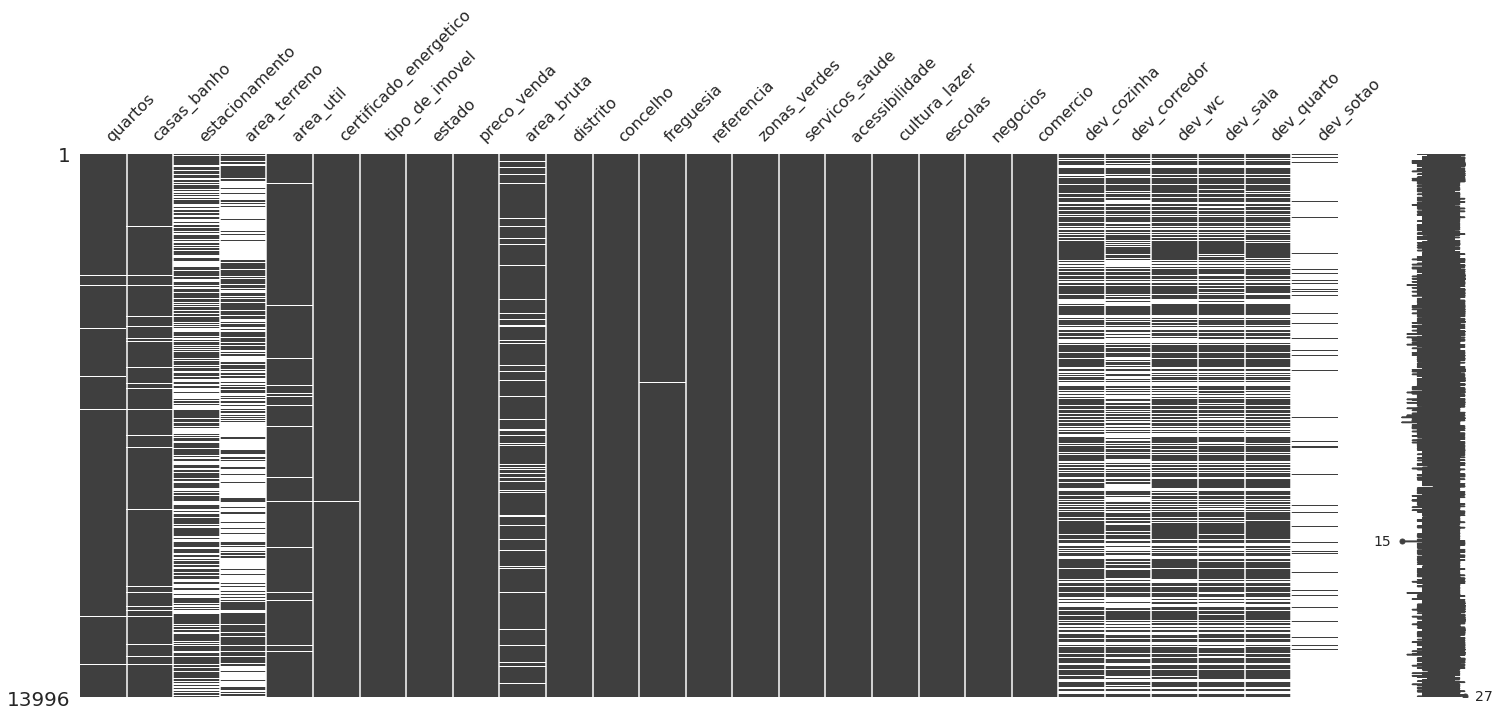

In [20]:
# Distribuição dos valores omissos
msno.matrix(houses_clean)

In [21]:
houses_clean['tipo_de_imovel'].unique()

array(['Moradia em Banda', 'Moradia', 'Moradia Isolada',
       'Moradia Geminada', 'Apartamento', 'Andar Moradia',
       'Casa Senhorial', 'Moradia Rústica', 'Duplex', 'Triplex', 'Loft',
       'Palacete'], dtype=object)

In [22]:
categoria_apartamentos = ['Apartamento', 'Duplex', 'Triplex']
categoria_moradia = ['Moradia em Banda', 'Moradia', 'Moradia Isolada','Moradia Geminada', 'Andar Moradia','Casa Senhorial', 'Moradia Rústica','Loft','Palacete']

apartamentos = houses_clean[houses_clean['tipo_de_imovel'].isin(categoria_apartamentos)]
moradias = houses_clean[houses_clean['tipo_de_imovel'].isin(categoria_moradia)]

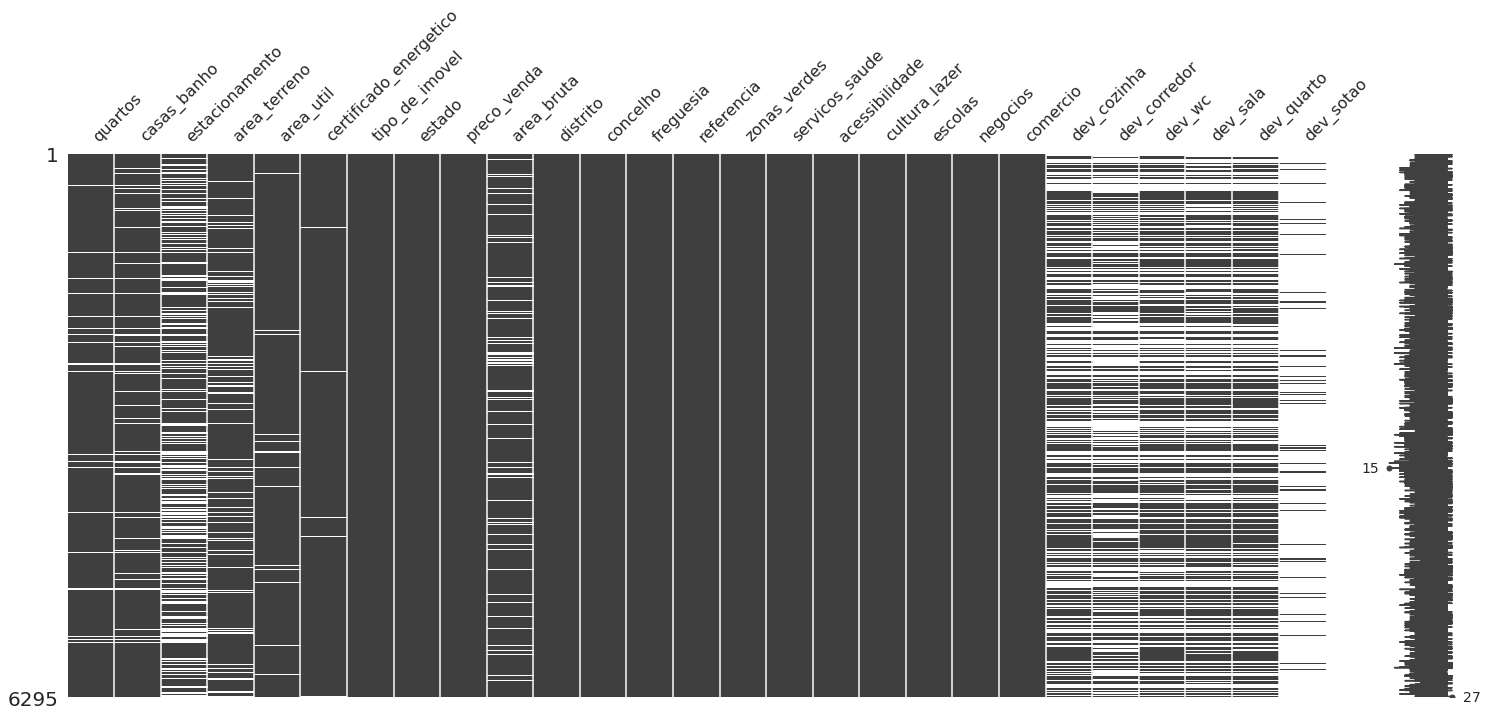

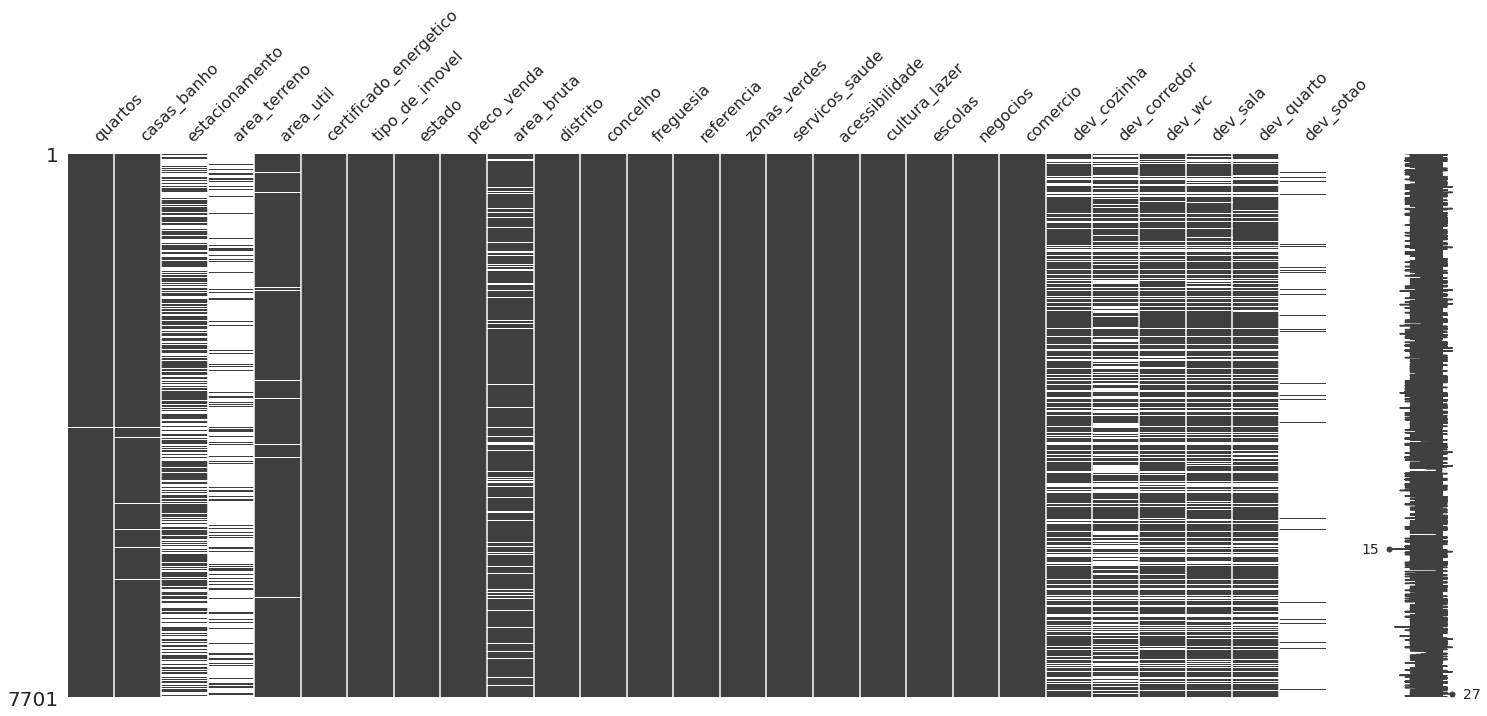

In [23]:
# Valores omissos com base no tipo de imóvel.
# Moradias
msno.matrix(moradias)

# Apartamentos
msno.matrix(apartamentos)

# Constata-se que a grande maioria dos valores omissos na variavel "area_terreno" são provenientes de imóveis do tipo - apartamento. 
# Assim sendo. Consideraremos que o valor nulo corresponde a ausência de terrenos e, por isso igualaremos a zero. 

In [24]:
# Substituição de todos os valores omissos por 0 (zero) na area_terreno para a categoria apartamento. 
houses_clean.loc[(houses_clean['tipo_de_imovel'].isin(categoria_apartamentos)) &(houses_clean['area_terreno'].isna()) , 'area_terreno'] = 0

# Estacionamento.
# A existencia de estacionamento é uma mais valia, se a mesma não esta identificada iremos considerar como não existente - zero 0
houses_clean['estacionamento'] = houses_clean['estacionamento'].fillna(0)

# Recorremos à seguinte equação para resolver a ausência de dados relativos às áreas: area_bruta = area_util + area_terreno
houses_clean['area_bruta'] = houses_clean['area_bruta'].fillna(houses_clean['area_util'] + houses_clean['area_terreno'])
houses_clean['area_util'] = houses_clean['area_util'].fillna(houses_clean['area_bruta'] - houses_clean['area_terreno'])
houses_clean['area_terreno'] = houses_clean['area_terreno'].fillna(houses_clean['area_bruta'] - houses_clean['area_util'])

Iniciamos a resolução dos valores omissos pela variável *area_terreno* considerando que todos os valores ausentes nesta variável em imóveis do tipo apartamento seria igual a 0, ou seja, em todos os casos em que esta variável não foi identificada consideramos que a mesma simplesmente não existe.

De seguida, inspecionamos a variável *estacionamento*, uma vez que tal como a área do terreno apresentava uma grande percentagem de valores omissos. Neste caso, consideramos que todos os valores ausentes em qualquer tipo de imóvel seriam substituídos por 0. A existência de lugar de estacionamento é uma mais valia que permite subir o preço de venda do imóvel. Se essa informação não está disponível existe uma enorme probabilidade de simplesmente o imóvel não conter essa característica o que resultou em não preenchimento do campo.

Realativamente à area_bruta, nos casos com esse valor em falta, consideramos o somatório da area_util e are_terreno para preenchimento desse campo e vice - versa.


In [25]:
# Visualização dos valores omissos.
total = houses_clean.isnull().sum().sort_values(ascending=False)
percent = houses_clean.isnull().mean().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
dev_sotao,12979,0.927336
dev_corredor,6198,0.442841
dev_sala,4702,0.335953
dev_wc,4563,0.326022
dev_quarto,4551,0.325164
dev_cozinha,4465,0.319020
casas_banho,532,0.038011
quartos,240,0.017148
area_bruta,143,0.010217
area_terreno,131,0.009360


O modelo não consegue fazer a leitura de valores nulos e o valor zero em algumas categorias tem um significado, por isso, escolhemos identificar todos o **valores ainda ausentes com o valor -1** 

In [26]:
houses_clean['quartos'].dtype == 'object'

False

In [27]:
houses_clean['freguesia'].fillna("None", inplace=True)
houses_clean['distrito'].fillna("None", inplace=True)
houses_clean['concelho'].fillna("None", inplace=True)
houses_clean['tipo_de_imovel'].fillna("None", inplace=True)
houses_clean['estado'].fillna("None", inplace=True)
houses_clean['certificado_energetico'].fillna("None", inplace=True)
houses_clean.fillna(-1, inplace=True)

In [28]:
houses_clean.columns

Index(['quartos', 'casas_banho', 'estacionamento', 'area_terreno', 'area_util',
       'certificado_energetico', 'tipo_de_imovel', 'estado', 'preco_venda',
       'area_bruta', 'distrito', 'concelho', 'freguesia', 'referencia',
       'zonas_verdes', 'servicos_saude', 'acessibilidade', 'cultura_lazer',
       'escolas', 'negocios', 'comercio', 'dev_cozinha', 'dev_corredor',
       'dev_wc', 'dev_sala', 'dev_quarto', 'dev_sotao'],
      dtype='object')

In [29]:
houses_clean[houses_clean['certificado_energetico']=="None"]

,quartos,casas_banho,estacionamento,area_terreno,area_util,certificado_energetico,tipo_de_imovel,estado,preco_venda,area_bruta,distrito,concelho,freguesia,referencia,zonas_verdes,servicos_saude,acessibilidade,cultura_lazer,escolas,negocios,comercio,dev_cozinha,dev_corredor,dev_wc,dev_sala,dev_quarto,dev_sotao
247,-1.0,-1.0,0.0,263.0,63.0,None,Moradia,Usado,33000,63.16,Porto,Baião,Campelo e Ovil,282210006,9,6,9,0,6,0,6,-1.0,-1.00,-1.00,-1.00,-1.0,-1.0
259,2.0,1.0,0.0,107.0,107.0,None,Moradia Isolada,Usado,41650,107.00,Santarém,Santarém,Almoster,101210017,0,0,0,0,0,0,0,-1.0,-1.00,-1.00,-1.00,-1.0,-1.0
1571,3.0,3.0,0.0,53.0,102.0,None,Moradia em Banda,Usado,96000,149.80,Castelo Branco,Castelo Branco,Castelo Branco,102200410,6,3,6,6,3,3,3,10.0,10.00,6.11,12.00,13.8,-1.0
2064,4.0,1.0,0.0,42.0,64.0,None,Moradia,Usado,40500,64.00,Santarém,Abrantes,Fontes,319200151,9,3,3,3,3,3,3,7.0,-1.00,6.00,3.00,9.0,-1.0
3081,3.0,-1.0,1.0,264.0,239.0,None,Moradia,Usado,48000,239.00,Santarém,Santarém,Vale de Santarém,101200104,3,3,9,3,3,6,3,-1.0,-1.00,-1.00,-1.00,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14229,3.0,4.0,4.0,772.0,236.0,None,Moradia Isolada,Construção,135000,296.00,Porto,Paços de Ferreira,Figueiró,332200169,6,3,6,3,6,6,6,15.0,29.00,6.50,37.00,23.0,80.0
14474,2.0,1.0,0.0,229.0,109.0,None,Moradia Isolada,Usado,61100,338.00,Santarém,Chamusca,Chamusca e Pinheiro Grande,294200238,6,3,9,3,6,3,6,26.0,5.78,4.84,20.27,16.0,-1.0
14539,3.0,1.0,1.0,219.0,219.0,None,Moradia,Usado,40000,109.00,Porto,Baião,Teixeira e Teixeiró,282200177,6,3,9,3,6,3,3,-1.0,-1.00,-1.00,-1.00,-1.0,-1.0
14586,2.0,1.0,0.0,83.0,49.0,None,Moradia Geminada,Usado,15000,83.00,Santarém,Ourém,Nossa Senhora da Piedade,362200404,9,3,9,3,6,3,3,-1.0,-1.00,-1.00,-1.00,-1.0,-1.0


Na análise da nossa base de dados verificamos que existiam **duplicados**, ou seja, imóveis com todas as características iguais (variavel referência não incluída, uma vez que se trata de um identificador único).
Esta situação, na generalidade, resulta de **moradias germinadas** vendidas todas ao mesmo preço e que apresentam as mesmas características.
No caso concreto do nosso estudo é importante eliminar estes duplicados para evitar que o modelo gere **overfitting.** ou que nos devolva resultados deturpados na fase de teste.


In [30]:
houses_clean.shape

(13996, 27)

In [31]:
houses_clean.duplicated(subset=['quartos',
                                'casas_banho',
                                'estacionamento',
                                'area_terreno',
                                'area_util',
                                'certificado_energetico',
                                'tipo_de_imovel',
                                'estado',
                                'preco_venda',
                                'area_bruta',
                                'distrito',
                                'concelho',
                                'freguesia',
                                'zonas_verdes',
                                'servicos_saude',
                                'acessibilidade',
                                'cultura_lazer',
                                'escolas',
                                'negocios',
                                'comercio',
                                'dev_cozinha',
                                'dev_corredor',
                                'dev_wc',
                                'dev_sala',
                                'dev_quarto',
                                'dev_sotao']).sum()

162

In [32]:
houses_clean = houses_clean.drop_duplicates(subset = ['quartos',
                                'casas_banho',
                                'estacionamento',
                                'area_terreno',
                                'area_util',
                                'certificado_energetico',
                                'tipo_de_imovel',
                                'estado',
                                'preco_venda',
                                'area_bruta',
                                'distrito',
                                'concelho',
                                'freguesia',
                                'zonas_verdes',
                                'servicos_saude',
                                'acessibilidade',
                                'cultura_lazer',
                                'escolas',
                                'negocios',
                                'comercio',
                                'dev_cozinha',
                                'dev_corredor',
                                'dev_wc',
                                'dev_sala',
                                'dev_quarto',
                                'dev_sotao'])

In [33]:
# Confirmar numero de linhas e colunas.
houses_clean.shape

(13834, 27)

In [34]:
# Definir a coluna referencia como indice.
houses_clean = houses_clean.set_index('referencia')

#### **3.2 OUTLIERS**

Os **outliers** são dados que se distanciam radicalmente de todos os outros. São pontos fora da curva normal, valores que fogem da normalidade e que podem causar desequilíbrio nos resultados obtidos. Um conjunto de dados pode apresentar um ou vários outliers. O efeito de um outlier é quase um efeito borboleta, um pequeno erro propaga-se e quando não tratado corretamente pode ocasionar problemas e anomalias. Em análises estatísticas o efeito do outlier pode ser facilmente observado.
Os boxplots permitem visualizar claramente estes outliers. Existem imensos outliers identificados, contudo os mesmos não serão removidos porque tem um significado para o modelo.

**Os boxplots poderão ser visualizados no ponto 4.2.**


### **4. DESCRIÇÃO DOS DADOS** 



###### **4.1 ESTATÍSTICA DESCRITIVA** 


A **estatística descritiva** é um ramo da estatística que aplica várias técnicas para descrever e sumarizar um conjunto de dados. Quando uma amostra contém 2 ou mais variáveis, como o dataset em questão, estamos
perante uma análise bivariada, na qual se procede a uma descrição da relação entre as variáveis presentes.
As técnicas mais usadas para proceder à descrição são: 

1. Construção de gráficos descritivos, por exemplo, histogramas;

2. Utilização de tabelas para sumariar dados; 

3. **Descrição paramétrica com as medidas de tendência central e dispersão** como a apresentada abaixo.

As **medidas de tendência central** ou de posição são indicadores que permitem sumariar o conjunto de dados observados da variável em estudo. De salientar, que a mediana ao contrário da média não sofre com a existência de valores discrepantes.

As **medidas de dispersão** servem para indicar o quanto os dados se apresentam dispersos, ou afastados, em relação ao seu valor médio. A utilização desses parâmetros tornam a análise de uma amostra mais confiável.

A **amplitude (Max-Min)** permite inferir à cerca da variabilidade dos dados, mas a **distância interquartil** é uma estatística mais robusta para medir variabilidade uma vez que não sofre influência de outliers.

Em estatística, a **assimetria** é uma medida da distorção da distribuição de probabilidade de uma variável aleatória sobre a média. O valor de assimetria pode ser positivo ou negativo. Se a assimetria é 0, os dados são
perfeitamente simétricos, embora seja bastante improvável na análise de dados reais. A **curtose** informa a altura e a nitidez do pico central, em relação a uma curva de distribuição normal.

Esta análise faz sentido quando realizada a variáveis numéricas desnormalizadas como será apresentado de seguida.

In [35]:
# Estatística descritiva.
round(houses_clean.describe(),2)

,quartos,casas_banho,estacionamento,area_terreno,area_util,preco_venda,area_bruta,zonas_verdes,servicos_saude,acessibilidade,cultura_lazer,escolas,negocios,comercio,dev_cozinha,dev_corredor,dev_wc,dev_sala,dev_quarto,dev_sotao
count,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00,13834.0,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00,13834.00
mean,2.82,2.04,1.09,720.34,126.35,268151.55,242.29,4.41,3.39,5.03,2.7,3.92,2.87,3.97,8.35,2.98,2.12,14.40,7.15,1.61
std,1.40,1.28,1.29,9186.35,425.36,310727.46,951.68,3.15,2.49,3.21,2.3,2.75,2.33,2.75,103.10,12.41,3.17,54.31,15.14,13.87
min,-1.00,-1.00,0.00,-170.00,-36895.91,1.00,-1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
25%,2.00,1.00,0.00,0.00,79.00,125000.00,90.00,0.00,0.00,3.00,0.0,0.00,0.00,0.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,3.00,2.00,1.00,8.00,109.00,190000.00,130.00,6.00,3.00,6.00,3.0,6.00,3.00,6.00,7.07,0.00,2.00,12.20,9.00,-1.00
75%,3.00,3.00,2.00,340.00,160.00,310000.00,212.00,6.00,6.00,6.00,3.0,6.00,6.00,6.00,13.00,6.00,4.41,25.00,13.00,-1.00
max,20.00,20.00,22.00,1005750.00,13323.00,14500000.00,65475.00,12.00,12.00,12.00,12.0,12.00,9.00,12.00,12010.00,1162.00,74.00,4835.00,1304.00,239.00


In [36]:
houses_clean[houses_clean['estacionamento']== 22]

,quartos,casas_banho,estacionamento,area_terreno,area_util,certificado_energetico,tipo_de_imovel,estado,preco_venda,area_bruta,distrito,concelho,freguesia,zonas_verdes,servicos_saude,acessibilidade,cultura_lazer,escolas,negocios,comercio,dev_cozinha,dev_corredor,dev_wc,dev_sala,dev_quarto,dev_sotao
referencia,,,,,,,,,,,,,,,,,,,,,,,,,,
307200305,3.0,3.0,22.0,3004.0,172.0,A+,Moradia Isolada,Novo,530000,199.0,Braga,Guimarães,Prazins (Santa Eufémia),9,6,6,3,6,0,6,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


Alguns aspetos a destacar:

- A amplitude da variável número de **quartos** é considerável (16-0 = 16), ou seja, temos imóveis que não tem esta divisão atribuída e temos imóveis com 16 quartos. A média são imóveis com 3 quartos. Na variável **casa de banho** a situação é semelhante.

- A amplitude do **preço de venda** é enorme (14 500 000 - 125 000 = 14 375 000), ou seja, existe um leque variado de preços atribuidos aos imóveis. 

- A acessibilidade é avaliada num leque de valores entre 0 e 9, em que 0 é mau e 9 é exelente. O valor médio obtido foi 5,11.


#### **4.2 ANÁLISE GRÁFICA DOS DADOS** 

In [37]:
# Função pra criar gráficos de barras.
def graph_bar(variavel, data, titulo, enfase=None):
  plt.figure(figsize=(20,11.25))
  if enfase is None:
    cores = ['#557A95']
  else:
    nomes = data[variavel].value_counts().index.tolist()
    cores = ['#f8961e' if (x in enfase) else '#557A95' for x in nomes]
    
  sns.countplot(y = variavel, 
              data = data, 
              order = data[variavel].value_counts().index, 
              palette = cores)
  plt.box(on=None)
  plt.xlabel("")
  plt.ylabel("")
  plt.xticks(size=15)
  plt.title(str(titulo) + "\n")
  plt.show()

Um **gráfico de Barras** permite transmitir informações sobre categorias diferentes. O comprimento de cada barra representa um
número.

O certificado energético é um documento que avalia a eficiência energética de um imóvel numa escala de A+ (muito eficiente) a F (pouco eficiente), emitido por técnicos autorizados pela Agência para a Energia.

A leitura do gráfico de barras dos imóveis por certificado energético permite inferir que as categorias de certificado energético que agrega mais imóveis são a C, D e E.

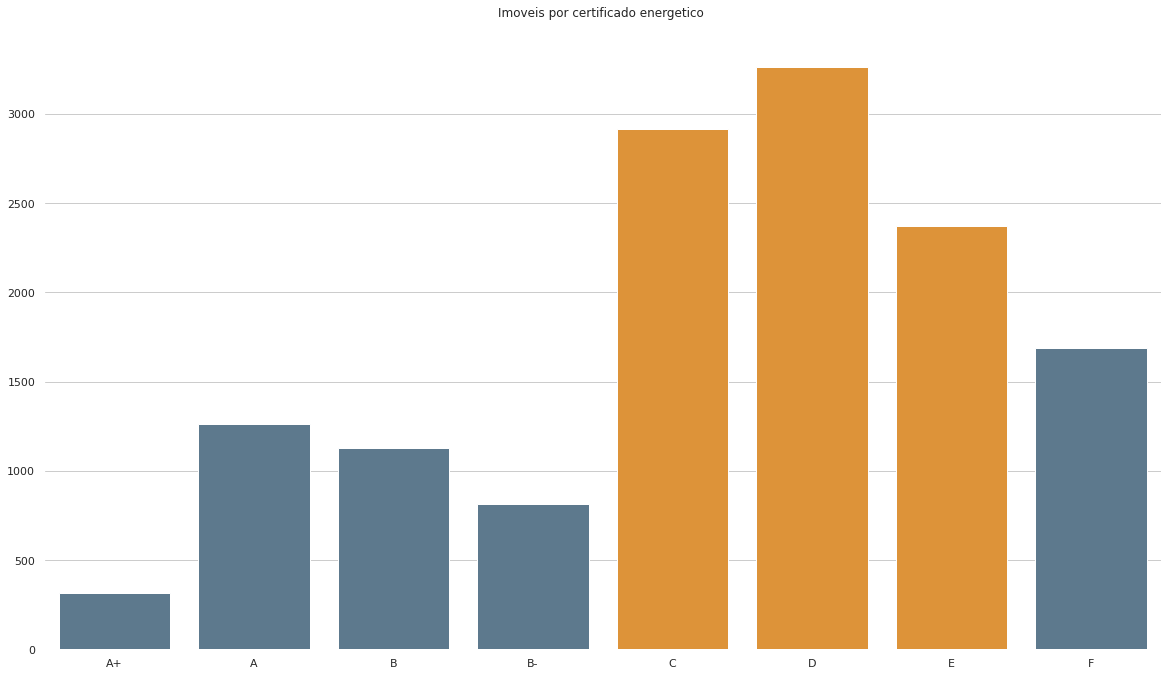

In [38]:
# Contagem por certificado energetico
plt.figure(figsize=(20,11.25))
certificado_ordem = ["A+", "A", "B", "B-", "C", "D", "E", "F"]
cores = ['#f8961e' if ((x == 'C') | (x == 'D') | (x == 'E')) else '#557A95' for x in certificado_ordem]
sns.countplot(x = "certificado_energetico", data = houses_clean, order = certificado_ordem, palette=cores)
plt.box(on=None)
plt.xlabel("")
plt.ylabel("")
plt.title("Imoveis por certificado energetico \n")
plt.show()

Na procura pela casa de sonho é importante definir o tipo de imóvel que pretendemos adquirir.

O tipo de imóvel mais popular atualmente é o **apartamento**. Ele pode ser definido como uma unidade habitacional que ocupa uma fração de um edifício, apresentando divisões internas definidas.

A organização dos condomínios garante aos apartamentos uma sensação maior de segurança, sendo essa uma das suas principais vantagens. Em função de sua versatilidade, especialmente no que se refere a valores e tamanhos, esse tipo de imóvel atrai um perfil de comprador bastante variado

Os dados que recolhemos revela que a oferta é substancialmente maior nesta tipologia de imóvel o que vai de encontro à preferência do comprador.

Construída sobre um terreno individual ou integrante de um condomínio, a **moradia** pode ser de diferentes modelos e estilos. Em geral, é a opção de quem procura mais espaço ou privacidade. 

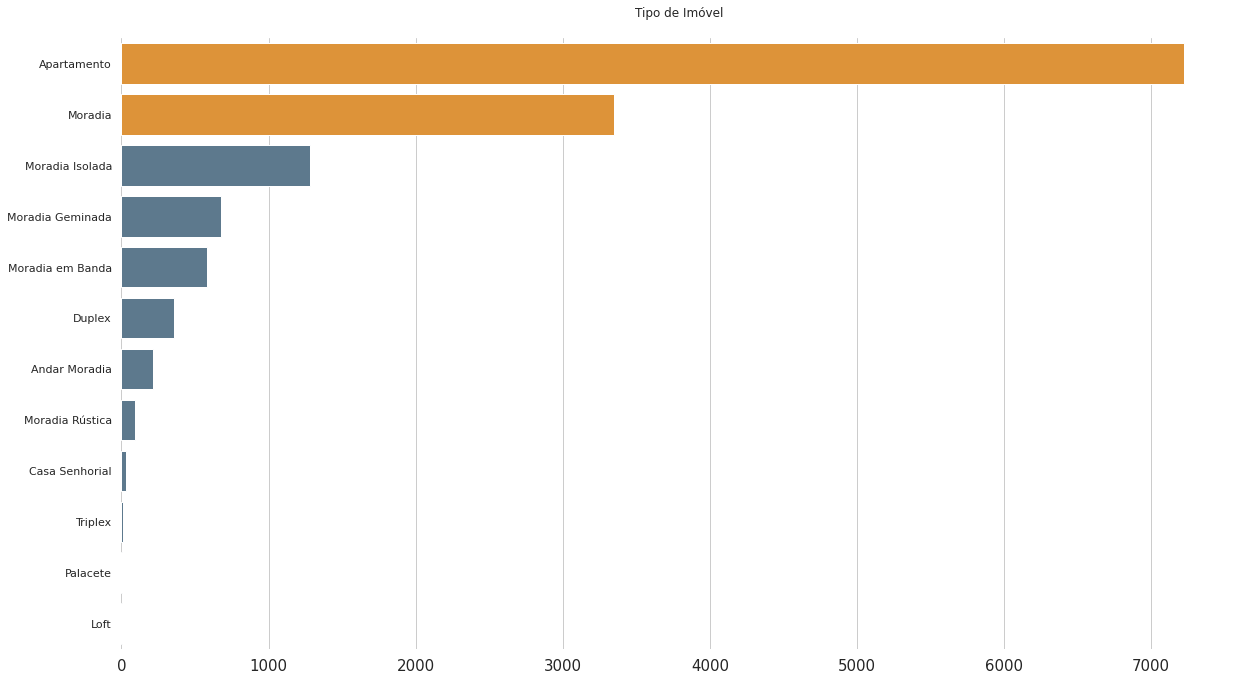

In [39]:
# Contagem por tipo de imóvel
graph_bar('tipo_de_imovel', 
          houses_clean, 
          'Tipo de Imóvel', 
          ['Apartamento', 'Moradia'])

As grandes cidades **( Porto e Lisboa)** apresentam o maior volume de oferta de imóveis que vai de encontro à nossa expectativa inicial.

A populaço concentra-se nas zonas urbanas e é aí que exerce a sua atividade profissional, constitui família e compra casa.


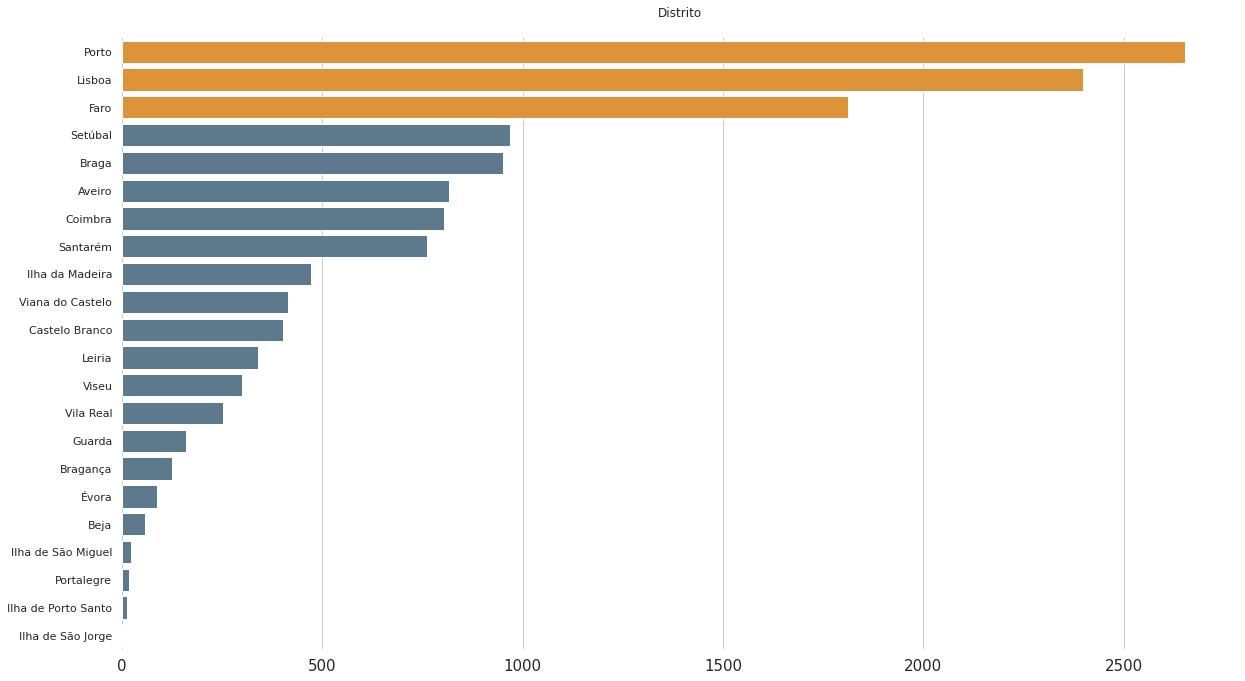

In [40]:
# Contagem por distrito
graph_bar('distrito', 
          houses_clean, 
          'Distrito', 
          ['Porto', 'Lisboa','Faro'])

Comprar casa é uma decisão muito importante e que deve ser tomada de forma consciente e ponderada. Devemos ter em atenção os mais diversos parâmetros

Uma das primeiras dúvidas que surgem nesta fase é  que tipo de imóvel comprar: novo, usado, na planta...

Ao comprar um  **imóvel na planta – ou em fase de construção** -, está a comprar, na verdade, uma promessa de construção e entrega da habitação.

Estes tipos de imóvel são cada vez mais populares em Portugal pois apresentam custos de compra mais reduzidos e o grau de valorização é elevado. Em alguns casos, existe a possibilidade de o pagamento ser feito em parcelas o que pode ser uma vantagem tendo em conta os valores de investimento em causa.

Uma das vantagens ao adquirir estas habitações, durante a fase de construção, é poder participar no processo de decoração interior, na definição da disposição das divisões, os materiais, acabamentos, funcionalidades e outras características.

O principal desafio é imaginar o resultado final do seu investimento e aguardar que a obra termine – o que pode levar vários meses, mais do que os previstos. Para além disso, a construção pode sofrer imprevistos, resultando em problemas que exijam remodelações futuras ou até impossibilitando o acabamento e entrega da habitação

**Este tipo de casas representam uma minoria na nossa amostra.**

O tipo de imóvel relativamente ao estado mais frequente no mercado é o  **imóvel usado**

Ao contrário dos novos, os imóveis usados são casas que já foram habitadas anteriormente - ou que se encontram ainda habitadas. Regra geral, **o valor destas habitações é mais baixo.**

Por vezes, dependendo do estado do imóvel, é necessário fazer algumas remodelações. Mas, uma vez que o investimento que tem de fazer para comprar a casa é menor face à aquisição de uma casa nova e pronta a habitar, tem mais flexibilidade económica para as alterações que deseja e maior controlo dos acabamentos, qualidade dos materiais, disposição e funcionalidades da habitação.


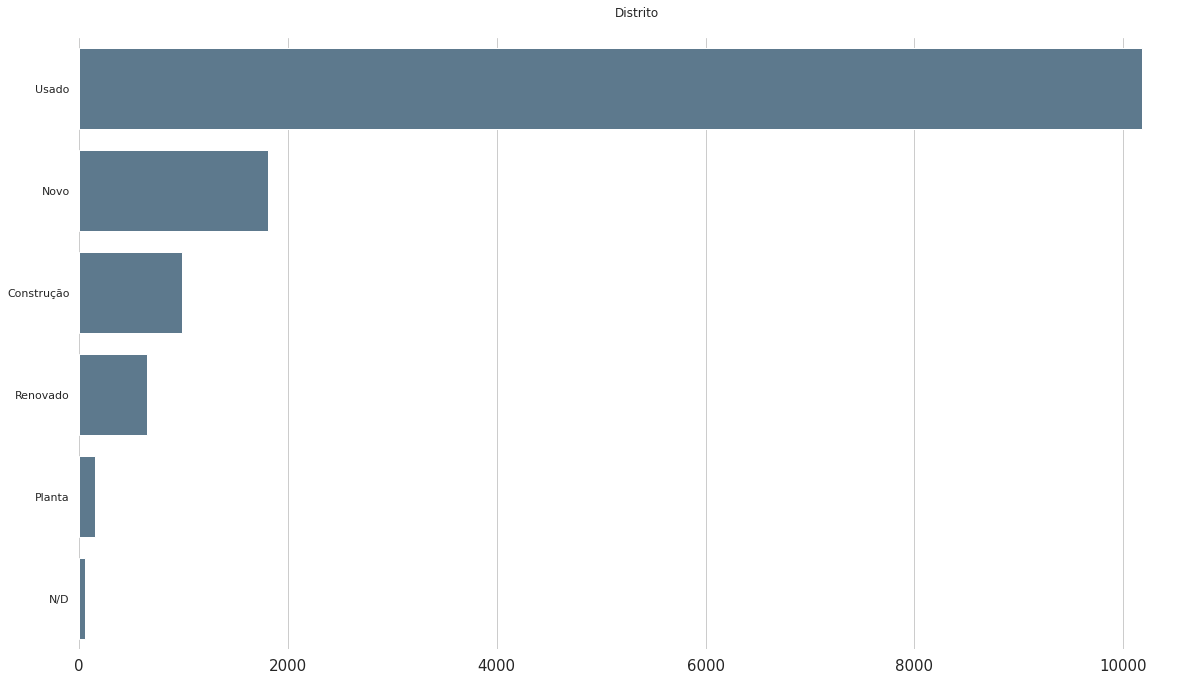

In [41]:
# Contagem por estado
graph_bar('estado', 
          houses_clean, 
          'Distrito', 
          ['Porto', 'Lisboa','Faro'])

In [42]:
# Função pra produzir diagrama de extremos e quartis.
def graph_boxplot(x,y, data, titulo, ordem=None):
  plt.figure(figsize=(20,11.25))
  cores = ['#557A95']
  plot= sns.boxplot(x = y,
              y=x,
              data = data,  
              palette = cores,
              order = ordem)
  plot.set(xlim=(0, max(data[y]/2.5)))
  plt.box(on=None)
  plt.xlabel("")
  plt.ylabel("")
  plt.xticks(size=15)
  plt.title(str(titulo) + "\n")
  plt.show()

**Boxplot ou diagrama de caixa** é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspetiva
sobre o caráter dos dados. Além disso, o boxplot também é uma disposição gráfica comparativa. As medidas de estatísticas descritivas como o mínimo, máximo, primeiro quartil, segundo quartil ou mediana e o terceiro
quartil formam o boxplot.



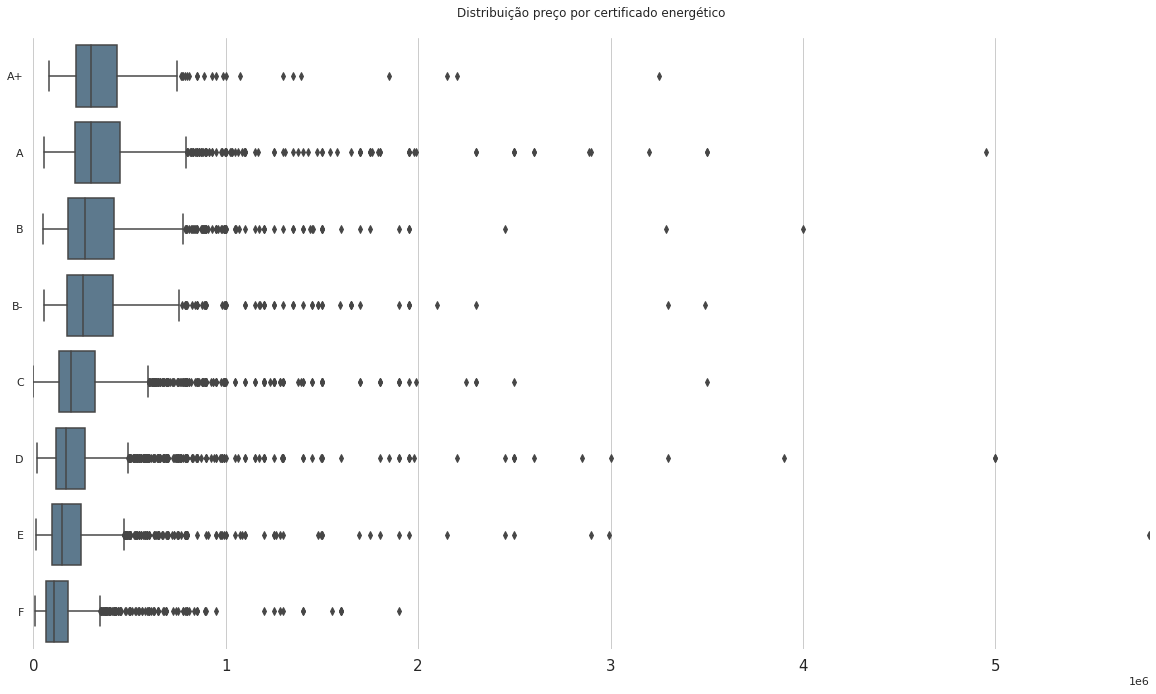

In [43]:
# Boxplot certificado energetico x precço de venda
graph_boxplot('certificado_energetico', 
              'preco_venda', 
               houses_clean,
              'Distribuição preço por certificado energético',
               certificado_ordem)

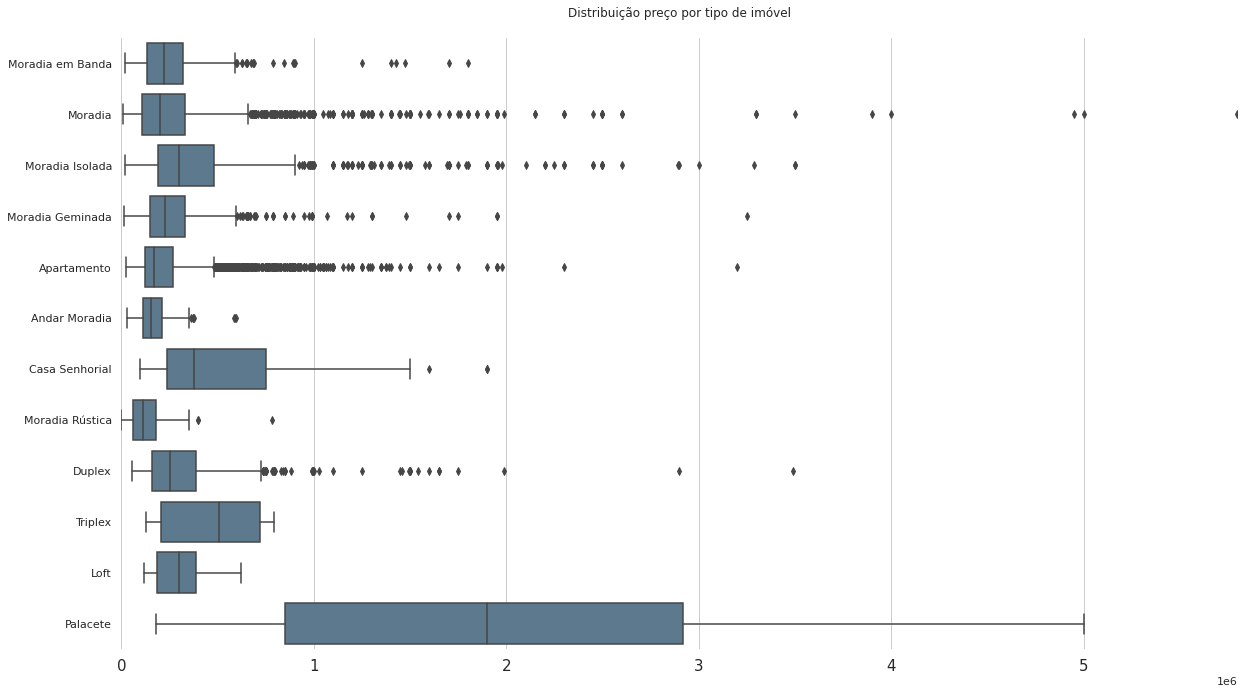

In [44]:
# Boxplot tipo de imóvel x precço de venda
graph_boxplot('tipo_de_imovel', 
              'preco_venda', 
               houses_clean,
              'Distribuição preço por tipo de imóvel')

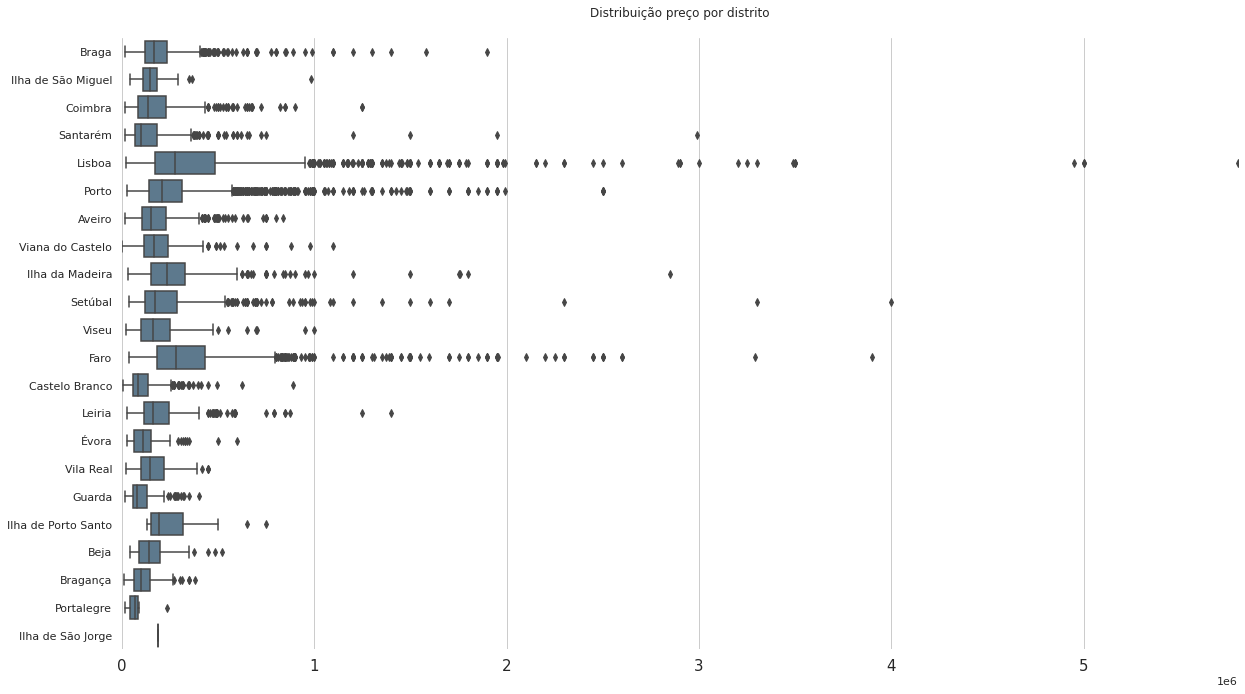

In [45]:
# Boxplot distrito x precço de venda
graph_boxplot('distrito', 
              'preco_venda',
               houses_clean,
              'Distribuição preço por distrito')

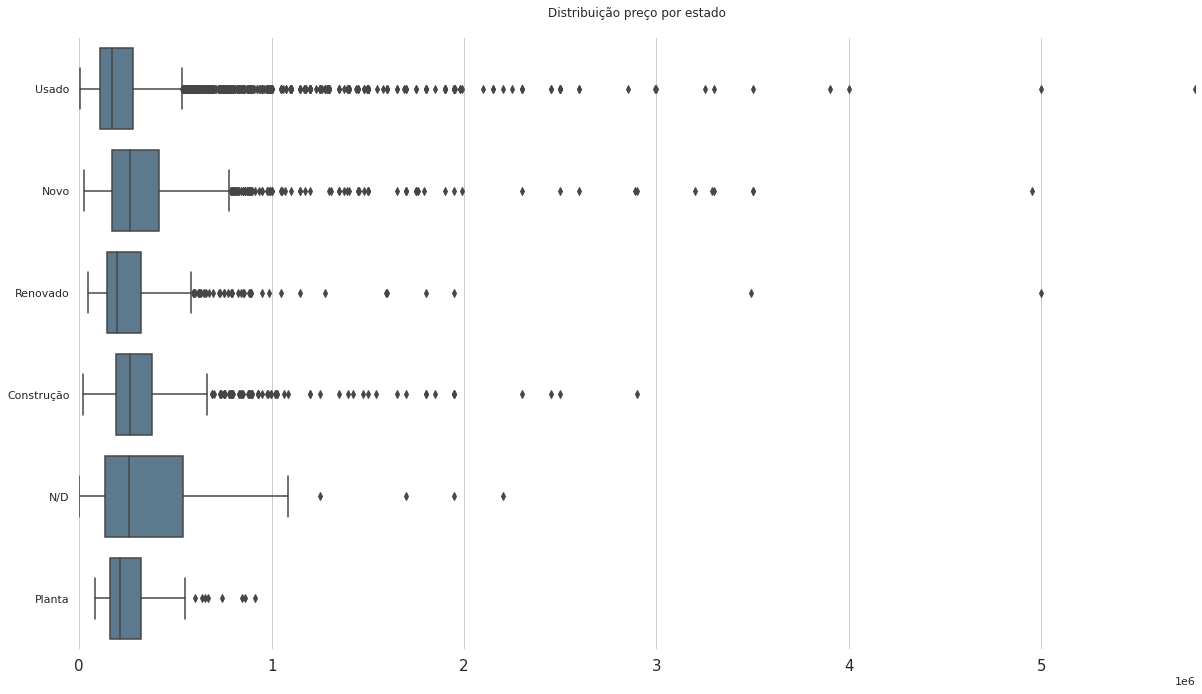

In [46]:
# Boxplot estado x precço de venda
graph_boxplot('estado', 
              'preco_venda', 
               houses_clean,
              'Distribuição preço por estado')

O **histograma** nada mais é do que um gráfico de barras que mostra a distribuição de dados (distribuição de frequência). Pode ser visto como um      indicador da variabilidade/dispersão. Dispõe as informações de modo
que seja possível a visualização da forma da distribuição de um conjunto de dados e também a perceção da localização do valor central e da dispersão dos dados em torno deste valor. Um histograma funciona melhor quando o tamanho de amostra é > que 20. Se o tamanho de amostra for muito pequeno, cada barra no
histograma pode não conter dados suficientes para demonstrar precisamente a sua distribuição. Quanto maior a amostra, mais o histograma se parecerá com a forma da distribuição da população. Tendo em conta, que este dataset contém milhares de imóveis é esperado que este método funcione bem.

O gráfico foi construído utilizando uma **escala logarítmica.** Uma escala logarítmica é uma escala que usa o logaritmo de uma grandeza em vez da grandeza propriamente dita.

A apresentação de dados em uma escala logarítmica pode ser útil quando os dados cobrem uma grande gama de valores, como é o caso. **O logaritmo reduz a representação a uma escala mais fácil de visualizar**


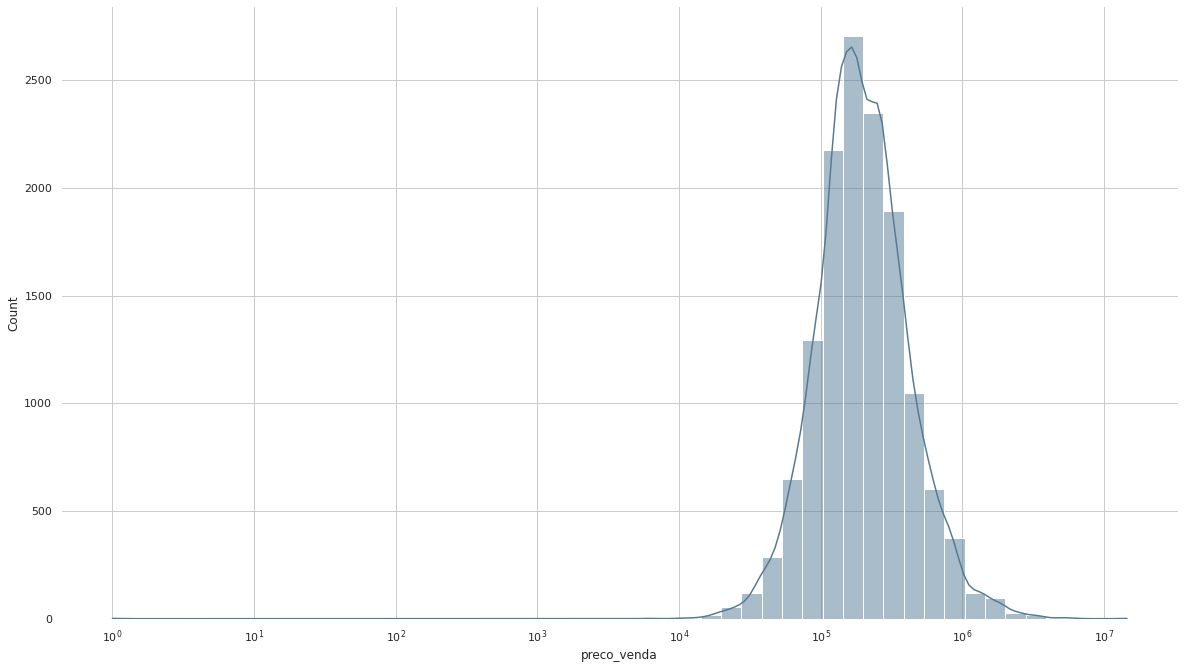

In [47]:
# Histograma preço de venda
plt.figure(figsize=(20,11.25))
sns.histplot(data=houses_clean, x="preco_venda", bins=50, kde=True, log_scale=True, color = '#557A95')
plt.box(on=None)

 A **correlação** é uma medida de relacionamento linear entre duas variáveis. Duas variáveis
podem estar:
- Positivamente relacionadas (quando uma aumenta, a outra aumenta proporcionalmente)
- Negativamente relacionadas (quando uma aumenta, a outra diminui proporcionalmente)
- Não há relação entre as variáveis. (r = 0)
Quando trabalhamos com mais do que uma variável regressora, é muito importante verificar se essas variáveis explicativas são correlacionadas. Desta forma, se não houver nenhum relacionamento entre elas, dizemos que são ortogonais. Se as variáveis forem muito correlacionadas, as inferências baseadas no modelo de regressão podem ser errôneas ou pouco confiáveis.
Na literatura, o termo **Colinearidade** é utilizado para indicar a existência forte de correlação entre duas (ou mais) variáveis independentes.

In [48]:
# Matrix de correlação.
matrix_correlacao = houses_clean.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(matrix_correlacao, dtype=bool))
matrix_correlacao

,quartos,casas_banho,estacionamento,area_terreno,area_util,preco_venda,area_bruta,zonas_verdes,servicos_saude,acessibilidade,cultura_lazer,escolas,negocios,comercio,dev_cozinha,dev_corredor,dev_wc,dev_sala,dev_quarto,dev_sotao
quartos,1.000000,0.615205,0.386011,0.051974,0.103697,0.319783,0.108864,0.109748,0.032647,0.049714,0.030132,0.045451,0.023164,-0.003374,0.006085,0.070549,0.036441,0.043228,0.038643,0.089889
casas_banho,0.615205,1.000000,0.494511,0.059379,0.115432,0.477431,0.077788,0.074073,0.010578,0.028875,0.036604,0.016133,-0.002718,-0.018995,0.009383,0.064265,0.073011,0.097150,0.086105,0.059046
estacionamento,0.386011,0.494511,1.000000,0.049391,0.104532,0.324205,0.102439,0.079888,0.004385,0.027429,0.007322,0.006272,-0.018453,-0.040801,0.011131,0.046453,0.049828,0.071015,0.051551,0.067501
area_terreno,0.051974,0.059379,0.049391,1.000000,-0.010807,0.077137,0.100974,0.038673,-0.021402,-0.001004,-0.010257,-0.023486,-0.020214,-0.028275,-0.000506,-0.001574,-0.014394,0.002294,-0.002711,0.014681
area_util,0.103697,0.115432,0.104532,-0.010807,1.000000,0.097748,0.093451,0.027706,0.012556,0.020460,0.011964,0.019136,0.015645,0.007926,0.004026,0.025302,0.028577,0.019454,0.020249,0.043748
preco_venda,0.319783,0.477431,0.324205,0.077137,0.097748,1.000000,0.086559,0.015292,-0.047022,-0.015411,0.043899,-0.060012,-0.030330,-0.030257,0.007711,0.040078,0.061176,0.081355,0.055638,0.023095
area_bruta,0.108864,0.077788,0.102439,0.100974,0.093451,0.086559,1.000000,0.025920,-0.025607,-0.021762,-0.011141,-0.032065,-0.020451,-0.039586,-0.003008,-0.001747,-0.045339,-0.006466,-0.020183,0.008953
zonas_verdes,0.109748,0.074073,0.079888,0.038673,0.027706,0.015292,0.025920,1.000000,0.468140,0.671362,0.493917,0.512266,0.385892,0.497320,-0.000282,0.034575,0.108822,0.014508,0.060123,0.053115
servicos_saude,0.032647,0.010578,0.004385,-0.021402,0.012556,-0.047022,-0.025607,0.468140,1.000000,0.618230,0.404048,0.753108,0.534243,0.647685,-0.001744,0.049467,0.127245,0.011855,0.056571,0.031066
acessibilidade,0.049714,0.028875,0.027429,-0.001004,0.020460,-0.015411,-0.021762,0.671362,0.618230,1.000000,0.510691,0.676074,0.548204,0.718697,-0.002038,0.044968,0.140385,0.014086,0.069949,0.029131


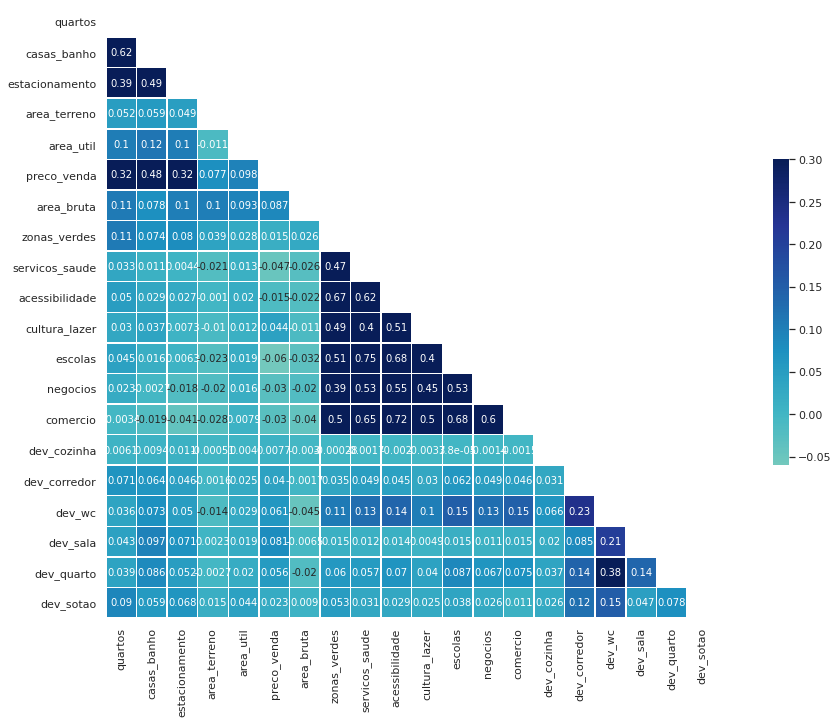

In [49]:
# Matrix de correlação - gráfico.
f, ax = plt.subplots(figsize=(20,11.25))
sns.heatmap(matrix_correlacao, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

Conclusões:

- As **variáveis que caracterizam a zona** onde a casa se insere apresentam entre elas uma **correlação positiva acentuada**. (ex. escolas e serviços_saude). 

- Existe uma **correlação positiva moderada entre o preço_ venda e o número de quartos, casas_banho e lugares de estacionamento**, ou seja, um aumento de 1 unidade nestas variáveis, levará a um aumento de preço do imóvel, ceteris paribus.

- A variável preço_venda não apresenta mais nenhuma relação significativa o que poderá afetar o ajuste do modelo ao problema proposto.




### **5. PRESSUPOSTOS DO MODELO**

#### **5.1. VARIÁVEIS CATEGÓRICAS**

Uma **neural network é um modelo computacional** capaz de reconhecer padrões e relações entre variáveis.  Este tem como pré requisito que todas as variáveis sejam númericas, como tal utilizamos o conceito de **variável dummy** para lidar com as variáveis categóricas do dataset.

Variáveis dummy são variáveis binárias (0 ou 1) criadas para **representar uma variável com duas ou mais categorias.**


In [50]:
houses_clean = pd.get_dummies(houses_clean)

In [51]:
houses_clean.shape

(13834, 1849)

#### **5.2. SEPARAÇÃO DE VAR. INDEPENDENTES E DEPENDENTES** 

Este procedimento facilita as etapas seguintes de treino e teste do modelo.

In [52]:
X = houses_clean.drop('preco_venda',axis =1).values
y = houses_clean['preco_venda'].values

### **6. DESCRIÇÃO DO PROCEDIMENTO DE TREINO E TESTE DO MODELO**

Poderíamos utilizar a totalidade dos dados históricos no processo abaixo, criando assim um modelo de machine learning pronto para receber novos dados e realizar previsões, porém desta forma não saberíamos o real desempenho deste modelo. O algoritmo poderia aprender perfeitamente a relação existente nos dados apresentados e com isso criar um modelo que sofre de **Overfitting** e só descobriríamos esse problema após as previsões desastrosas geradas por este modelo.

Desta forma, para medir o desempenho real do modelo criado, foi necessário realizar testes com ele, utilizando dados diferentes dos que foram apresentados no momento da sua criação. Com esta finalidade, após a realização do pré-processamento, procedemos à separação da totalidade dos
dados históricos existentes em dois grupos, sendo o primeiro responsável pelo treino do modelo – designado **train**, e o segundo por realizar os testes – designado **test** numa proporção **90/10**. 

In [53]:
# Divisão dos dados em train e test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=126)

A **transformação dos dados**, previamente tratados, é uma prática que permite evitar que o **algoritmo fique enviesado para as variáveis com maior ordem de grandeza.**

As duas técnicas **(normalizar e padronizar)** têm o mesmo objetivo: transformar todas as variáveis na mesma ordem de grandeza. E a diferença básica é que padronizar as variáveis irá resultar em uma média igual a 0 e um desvio padrão igual a 1. Já normalizar tem como objetivo colocar as variáveis dentro do intervalo de 0 e 1, caso tenha resultado negativo -1 e 1.

In [54]:
# Standardização variaveis
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

#### **6.1. O MODELO**

O Keras é uma **API de redes neurais em Python**. Este é caracterizado pela sua simplicidade e fácil utilização, podendo rodar em cima de bibliotecas de deep learning como é o caso do **TensorFlow**

O Keras permite compilar redes neurais combinando camadas de diferentes dimensões e funções de ativação, tornando o ciclo de desenvolvimento de novos modelos de aprendizagem significativamente mais rápido.

O **modelo sequencial** permite inserir camadas em série, onde o output da primeira camada serve como input da segunda, e assim por conseguinte.

Dos tipos de camadas do Keras, a **“Dense”** é a mais utilizada nos casos de regressão. Ela tem como objetivo calcular uma função de ativação com os dados de entrada e pesos.

O número de variáveis selecionadas define a dimensão da primeira camada **(“input_shape”)**. Para além disto, é também necessário definir o número de neurónios para as camadas subsquentes e o tipo de ativação.

Existem diversas funções de ativação, nomeadamente a sigmoid, reLU, softsign ... Para o nosso modelo foi usada a **reLU**. ReLU é uma abreviação para rectified linear unit, ou unidade linear retificada. Ela produz resultados no intervalo [0, ∞[.

A **função ReLU** retorna 0 para todos os valores negativos, e o próprio valor para valores positivos. É uma função computacionalmente leve, todavia tende a “apagar” alguns neurônios durante o forward no caso de existirem valores negativos.

Mesmo com suas limitações, a função ReLU é hoje uma das funções de ativação mais utilizadas no treino de redes neurais.

Uma técnica simples e poderosa de regularização utilizada em redes neurais e modelos de deep learning é o **dropout**.

A **compilação** serve para configurar o processo de aprendizagem. Devem ser escritas a função que define como os pesos da rede neural são atualizados **(“optimizer”)**, a função de calcula a diferença entre os dados de teste e os dados de validação **(“loss”)** e uma lista de métricas a ser usada para avaliação **(“metrics”)**

Por fim, recorrendo ao método **“fit”** treinamos o modelo para um determinado número de **“epochs”** (iterações) com determinado **“batch_size”**. 

Para finalizar, falta referir que a última camada só tem 1 neurónio, uma vez que se pretende obter apenas 1 valor final - o preço de venda do imóvel.





In [55]:
# Com base no numero de variaveis.
model = Sequential()
model.add(Dense(X_train.shape[1],activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(148,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(180,activation='relu'))
model.add(Dense(436,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(276,activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss='mae')

In [56]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=120)

Epoch 1/120
49/49 [==============================] - 3s 13ms/step - loss: 271351.5184 - val_loss: 263662.1875
Epoch 2/120
49/49 [==============================] - 0s 6ms/step - loss: 267975.8463 - val_loss: 251760.4219
Epoch 3/120
49/49 [==============================] - 0s 6ms/step - loss: 229220.2069 - val_loss: 151816.9531
Epoch 4/120
49/49 [==============================] - 0s 5ms/step - loss: 151429.5959 - val_loss: 133218.3281
Epoch 5/120
49/49 [==============================] - 0s 5ms/step - loss: 132051.0452 - val_loss: 123322.3125
Epoch 6/120
49/49 [==============================] - 0s 5ms/step - loss: 124301.5750 - val_loss: 115857.6562
Epoch 7/120
49/49 [==============================] - 0s 5ms/step - loss: 121100.0289 - val_loss: 109627.1016
Epoch 8/120
49/49 [==============================] - 0s 5ms/step - loss: 108694.3336 - val_loss: 104532.5234
Epoch 9/120
49/49 [==============================] - 0s 5ms/step - loss: 101635.4877 - val_loss: 100239.5234
Epoch 10/120
49/49

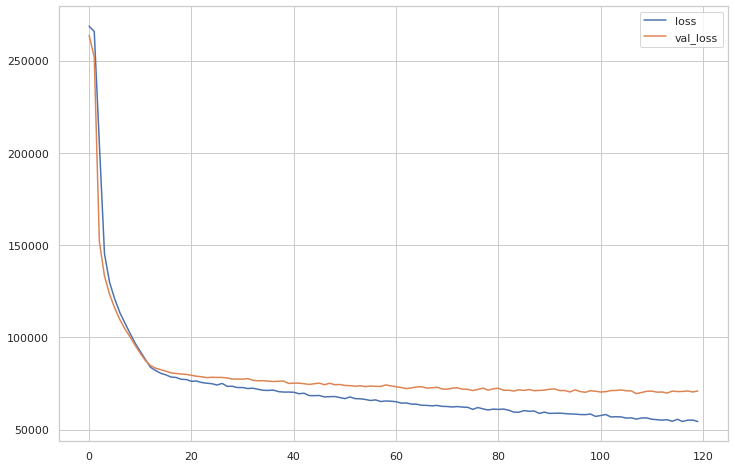

In [57]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1848)              3416952   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               924500    
_________________________________________________________________
dense_2 (Dense)              (None, 148)               74148     
_________________________________________________________________
dropout (Dropout)            (None, 148)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               26820     
_________________________________________________________________
dense_4 (Dense)              (None, 436)               78916     
_________________________________________________________________
dropout_1 (Dropout)          (None, 436)               0

In [59]:
y_pred = model.predict(X_test)

#### **6.2. MÉTRICAS DE AVALIAÇÃO DO MODELO**

- O **MAE (MEAN ABSOLUTE ERROR)** mede a magnitude média dos erros num conjunto de previsões, sem considerar a direção. É a média sobre a amostra de teste das diferenças absolutas entre a previsão e a observação real, em que todas as diferenças individuais têm peso igual.

- O **MSE (MEAN SQUARE ERROR)** indica o quão próxima uma linha de regressão está de um conjunto de pontos,
contabilizando as distâncias dos pontos até a linha de regressão e elevando-as ao quadrado. O quadrado
permite remover quaisquer sinais negativos. Também dá mais peso a diferenças maiores. Quanto menor for o erro quadrático médio, mais perto estaremos de encontrar a linha que melhor se ajuste ao conjunto de dados em análise. 

- O **RMSE (Root mean squared error)** é uma regra de pontuação quadrática que também mede a magnitude média do erro. É a raiz quadrada da média das diferenças quadradas entre a previsão e a observação real.

**MAE e RMSE aseemelham-se** porque expressam o erro médio de predição do modelo em unidades da variável de interesse. Ambas as métricas podem variar de 0 a ∞ e são indiferentes à direção dos erros. São pontuações com orientação negativa, o que significa que valores mais baixos são melhores.

Tirar a raiz quadrada dos erros quadrados médios tem algumas implicações interessantes para o RMSE. Uma vez que os erros são elevados ao quadrado antes de serem calculados, o RMSE atribui um peso relativamente alto aos erros grandes.Isso significa que o **RMSE deve ser mais útil quando erros grandes são particularmente indesejáveis.** 

O **R-quadrado** é uma medida estatística que mede o quão próximos os dados estão da linha de regressão ajustada. Ele também é conhecido como o coeficiente de determinação. Por outras palavras, define-se como a percentagem da variação da variável resposta que é explicada por um modelo linear.

Com base nestas métricas concluimos:

- O erro do nosso modelo é elevado, na ordem dos milhares, o que poderá indiciar que o nosso modelo não é neste momento capaz de se ajustar corretamente aos dados.

- O nosso modelo de regressão é capaz de explicar 70% da variação da variável preço_venda.

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
print('R2:',metrics.r2_score(y_test,y_pred))

MAE: 70939.06207663476
MSE: 29168761212.762375
RMSE: 170788.64485896705
VarScore: 0.7044800937413691
R2: 0.6964564523017993


In [61]:
# model.save('price_prediction.h5')

**Criação de função para explorar o erro**


In [62]:
def check_error(y_test, y_pred):
  size = len(list(y_test))
  error = {}
  for i in range(size):
    error[i] = [y_test[i], int(abs(y_test[i]-y_pred[i])[0])]
  
  error_df = pd.DataFrame.from_dict(error, orient='index', columns=['value', 'abs_error'])
  return error_df

In [63]:
error = check_error(y_test, y_pred)
error['bins_20'] = pd.cut(error.value, 21)

In [64]:
mean_error = error.groupby('bins_20')['value'].mean()

In [65]:
mean_error_df = pd.DataFrame(mean_error).round(0).reset_index()

In [66]:
mean_error_df

,bins_20,value
0,"(5211.0, 286666.667]",150838.0
1,"(286666.667, 562333.333]",386623.0
2,"(562333.333, 838000.0]",671646.0
3,"(838000.0, 1113666.667]",924190.0
4,"(1113666.667, 1389333.333]",1203125.0
5,"(1389333.333, 1665000.0]",1537500.0
6,"(1665000.0, 1940666.667]",1838000.0
7,"(1940666.667, 2216333.333]",NaN
8,"(2216333.333, 2492000.0]",NaN
9,"(2492000.0, 2767666.667]",2600000.0


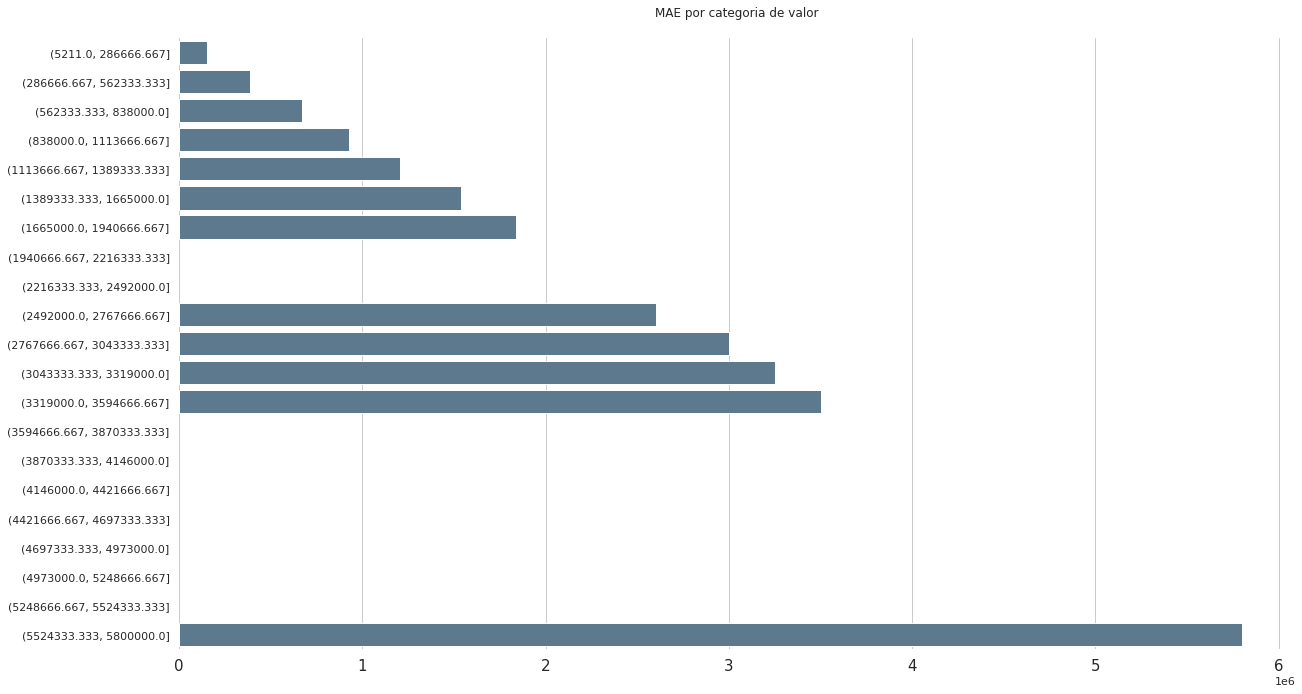

In [68]:
f, ax = plt.subplots(figsize=(20,11.25))
sns.barplot(data=mean_error_df, y="bins_20", x="value", estimator=np.mean, palette = cores)
cores = ['#557A95']
plt.box(on=None)
plt.xlabel("")
plt.ylabel("")
plt.xticks(size=15)
plt.title('MAE por categoria de valor' + "\n")
plt.show()

# Conclusão: Quanto maior o valor do imóvel, mais dificuldade o modelo tem em prever o preço.

### **7. CONCLUSÃO FINAL**

Diversas técnicas de data mining foram aplicadas neste trabalho para a previsão do preço de venda de um imóvel, tendo em conta variáveis como o número de quartos, acessibilidade a serviços...

Os resultados alcançados com os modelos de previsão desenvolvidos são pouco satisfatórios. Analisando o R2
dos modelos, verificamos que as variáveis explicam apenas 70% dos dados e que o modelo apresenta um erro muito elevado, na casa dos milheres. Esta situação agrava à medida que o preço de venda aumenta.

Esta situação poderia ser, possivelmente, contornada recorrendo à combinação de vários neural networks.

No decorrer do trabalho desenvolvido foram feitas opções que determinaram um rumo a seguir, outras opções poderiam ter sido tomadas e certamente outros resultados seriam encontrados e novas perspetivas se abririam.

Poderia ser interessante a aplicação de outro tipo de modelos como XGBoost.

Adicionalmente, o recurso mais aprofundado a feature engeenering poderia ser uma mais valia para o modelo.

